In [52]:
!pip install keras-self-attention

In [53]:
# -*- coding: utf-8 -*-
"""ConvAi.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/14R83utTbKA_QSkZkWnLI7RtM5ht1huqE
"""

import pandas as pd
from tensorflow.keras import layers
#import matplotlib.pyplot as plt 
import numpy as np
#from sklearn.preprocessing import StandardScaler
import os
from os.path import exists, join, basename, splitext

import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error
from scipy import stats

from keras_self_attention import SeqSelfAttention,SeqWeightedAttention

In [54]:
np_input = np.load("./Input_Output/Input.npy")
np_output = np.load("./Input_Output/Output.npy")

print(np_input.shape)
print(np_output.shape)

(121, 120, 20)
(121, 1)


In [55]:
class_output = []
for i in np_output:
  if i[0]==0:
    class_output.append([1,0,0,0])
  elif i[0]==0.33:
    class_output.append([0,1,0,0])
  elif i[0]==0.66:
    class_output.append([0,0,1,0])
  elif i[0]==1.:
    class_output.append([0,0,0,1])

class_output = np.array(class_output)
class_output = np.reshape(class_output,[121,4])

In [56]:
np_input = np_input[:120, :]
np_output = class_output[:120, :]

print(np_input.shape)
print(np_output.shape)

(120, 120, 20)
(120, 4)


In [57]:
model = Sequential()
model.add(Dense(16,input_shape=(120,20),activation='relu'))
model.add(Bidirectional(LSTM(16,return_sequences=True)))
model.add(Dropout(0.2))
model.add(SeqWeightedAttention())

model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 120, 16)           336       
_________________________________________________________________
bidirectional_4 (Bidirection (None, 120, 32)           4224      
_________________________________________________________________
dropout_4 (Dropout)          (None, 120, 32)           0         
_________________________________________________________________
seq_weighted_attention_4 (Se (None, 32)                33        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 68        
Total params: 5,189
Trainable params: 5,189
Non-trainable params: 0
____________________________________________________

In [58]:
#plot_model(model, to_file='outputs.png')

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
history = model.fit(np_input, np_output, validation_split=0.2, epochs=40, batch_size=32)

print(history.history.keys())

model.save("Saved_Model")

Epoch 1/40
3/3 [==============================] - 3s 375ms/step - loss: 1.3779 - accuracy: 0.2930 - val_loss: 1.3452 - val_accuracy: 0.2083
Epoch 2/40
3/3 [==============================] - 0s 32ms/step - loss: 1.3234 - accuracy: 0.2461 - val_loss: 1.2833 - val_accuracy: 0.2917
Epoch 3/40
3/3 [==============================] - 0s 31ms/step - loss: 1.2748 - accuracy: 0.3320 - val_loss: 1.2306 - val_accuracy: 0.5417
Epoch 4/40
3/3 [==============================] - 0s 29ms/step - loss: 1.2194 - accuracy: 0.5234 - val_loss: 1.1732 - val_accuracy: 0.6250
Epoch 5/40
3/3 [==============================] - 0s 31ms/step - loss: 1.1826 - accuracy: 0.5482 - val_loss: 1.1235 - val_accuracy: 0.6250
Epoch 6/40
3/3 [==============================] - 0s 29ms/step - loss: 1.1611 - accuracy: 0.5169 - val_loss: 1.0839 - val_accuracy: 0.6250
Epoch 7/40
3/3 [==============================] - 0s 32ms/step - loss: 1.1230 - accuracy: 0.5404 - val_loss: 1.0537 - val_accuracy: 0.6250
Epoch 8/40
3/3 [==========

INFO:tensorflow:Assets written to: Saved_Model/assets


INFO:tensorflow:Assets written to: Saved_Model/assets


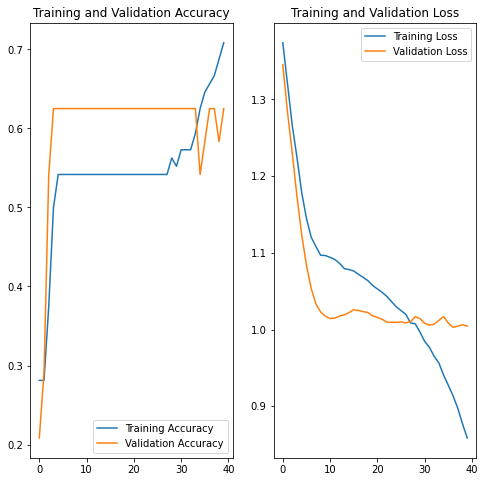

In [59]:
epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:

# Predicting testing set for evaluation

test_gt = np.load("./Input_Output/Input_test.npy")
test_pred = np.load("./Input_Output/Output_test.npy")

y_test = model.predict(test_gt)

#y_test = y_test.reshape(-1)
#np.save("drive/MyDrive/Conv_AI//Output_data/Y_test",y_test)

#test_pred = test_pred.reshape(-1)
#np.save("drive/MyDrive/Conv_AI//Output_data/X_test", test_pred)




In [61]:
pred_list = []
for i in y_test:
  if tf.argmax(i).numpy()== 0:
    pred_list.append(0)
  elif tf.argmax(i).numpy()== 1:
    pred_list.append(0.33)
  elif tf.argmax(i).numpy()== 2:
    pred_list.append(0.66)
  elif tf.argmax(i).numpy()== 3:
    pred_list.append(1.)

pred_list = np.array(pred_list)
pred_list = np.reshape(pred_list,[-1,1])

# 新段落

In [64]:
print(test_gt.shape)
print(test_pred.shape)
print(y_test.shape)
print(pred_list.shape)

(45, 120, 20)
(45, 1)
(45, 4)
(45, 1)


In [65]:
rms = mean_squared_error(test_pred,pred_list)

print(rms)

0.1259422222222222
